In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np


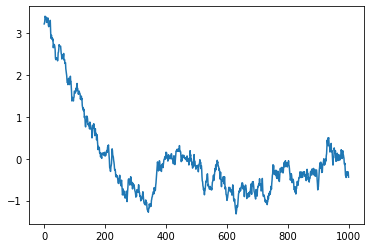

In [41]:
def random_walk(size):
    walk = np.random.normal(0, 1, size=size).cumsum()
    walk -= walk.mean()
    walk /= walk.std()
    return walk

def normalize(vec):
    norm = (vec * vec).sum() ** 0.5
    return vec / norm

walk = random_walk(1000)
plt.plot(walk)

In [42]:
walk_fft = np.fft.fft(walk)
walk_ifft = np.fft.ifft(walk_fft)
assert np.allclose(walk, walk_ifft)

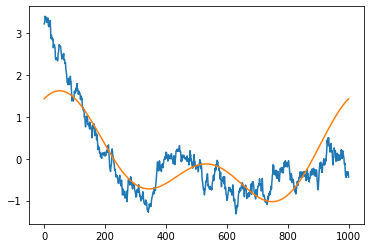

In [43]:
smoothed = np.zeros(len(walk))

total_bands = len(walk) // 2  # The transform generates this many
                              # positive frequency bands. The other
                              # half are "negative" frequency bands, 
                              # which are mirror images of the positive
                              # bands when the input is purely real

# The number of bands to use for smoothing
n_bands = 3

for i in range(0, n_bands):
    start = 0
    end = 2 * i * np.pi
    size = len(walk)
    t = np.linspace(start, end, size)
    real_wave = np.cos(-t)
    imag_wave = np.sin(-t)
    smoothed += (walk_fft[i].real / total_bands *
                 real_wave)
    smoothed += (walk_fft[i].imag / total_bands *
                 imag_wave)

plt.plot(walk)
plt.plot(smoothed)

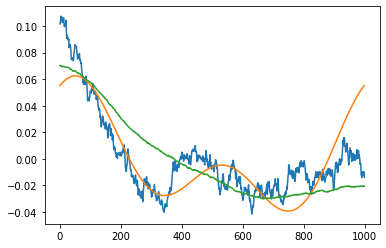

In [44]:
walks = np.array([random_walk(len(walk)) for i in range(1000)])
walks_cov = (walks.T @ walks) / len(walks)
eig = walk
for i in range(1):
    eig = walks_cov @ eig
    
plt.plot(normalize(walk))
plt.plot(normalize(smoothed))
plt.plot(normalize(eig))

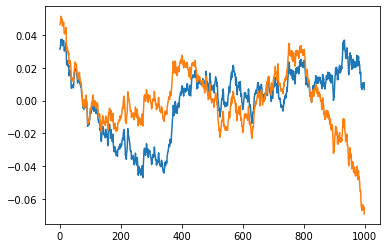

In [45]:
plt.plot(normalize(walk) - normalize(eig))
plt.plot(normalize(walk) - normalize(smoothed))

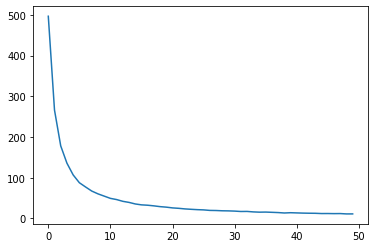

In [46]:
walks_fft = np.array([np.fft.fft(w)[1:len(w) // 2] for w in walks])
power = (walks_fft.real ** 2 + walks_fft.imag ** 2) ** 0.5
mean_power = power.mean(axis=0)
plt.plot(mean_power[0:50])